## Adding Libraries

In [ ]:

import pandas  as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import svm
from sklearn import preprocessing
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

## Adding Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets .csv')
data.head()

,Name,Account Age,Tweet count,List count,Location,Followers,Following,Favorites,ID,Created at,Tweet,Retweet count,Likes/Favs,Hashtag count,URL count,Tweet length,Place of tweet,mention count,tweet source,Label
0,AdarshAjit,7,39,0,"Cochin, India",22,83,274,1.397600e+18,2021-05-26 17:05:02,What's the one thing that is common between ti...,0,3,1,1,134,NaN,0,Twitter for Android,0
1,AdarshAjit,7,39,0,"Cochin, India",22,83,274,1.396798e+18,2021-05-24 12:00:01,I'm a great believer in luck and I find the ha...,0,3,0,1,140,NaN,0,Twitter Web App,0
2,TRBitTorrent,0,876,0,NaN,622,34,248,1.392351e+18,2021-05-12 05:30:00,#BitTorrent #BTT Türkiye Telegram grubuna kat...,0,1,8,2,138,NaN,0,TweetDeck,1
3,TRBitTorrent,0,876,0,NaN,622,34,248,1.392351e+18,2021-05-12 05:30:00,#Pancakeswap borsasından global borsalara çıka...,0,2,1,1,120,NaN,0,TweetDeck,1
4,TRBitTorrent,0,876,0,NaN,622,34,248,1.392336e+18,2021-05-12 04:30:00,#Pancakeswap borsasından global borsalara çıka...,0,0,1,1,120,NaN,0,TweetDeck,1


## Displaying Dataset Info

In [ ]:
print("Dimension of Dataset : ")
data.shape 

Dimension of Dataset : 


(9143, 20)

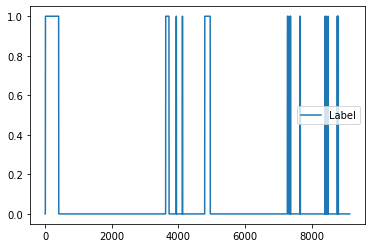

In [ ]:
data.loc[:,['Label']].plot()
plt.show()

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9143 entries, 0 to 9142
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            9143 non-null   object 
 1   Account Age     9143 non-null   int64  
 2   Tweet count     9143 non-null   int64  
 3   List count      9143 non-null   int64  
 4   Location        6112 non-null   object 
 5   Followers       9143 non-null   int64  
 6   Following       9143 non-null   int64  
 7   Favorites       9143 non-null   int64  
 8   ID              9143 non-null   float64
 9   Created at      9143 non-null   object 
 10  Tweet           9143 non-null   object 
 11  Retweet count   9143 non-null   int64  
 12  Likes/Favs      9143 non-null   int64  
 13  Hashtag count   9143 non-null   int64  
 14  URL count       9143 non-null   int64  
 15  Tweet length    9143 non-null   int64  
 16  Place of tweet  142 non-null    object 
 17  mention count   9143 non-null   i

## Label Count for each class(Spam/Legit)

In [ ]:
print("Number of tweets belonging to each classes:\n")
print("(1 - Spam  0 - Non-spam)\n")
data['Label'].value_counts()


Number of tweets belonging to each classes:

(1 - Spam  0 - Non-spam)



0    8416
1     727
Name: Label, dtype: int64

## Spliting The dataset to Train and test using train_test_split()

In [ ]:

#X = np.asarray(data[['Name','Account Age','Tweet count','List count','Location','Followers','Following','Favorites','ID','Created at','Tweet','Retweet count','Likes/Favs','Hashtag count','URL count','Tweet length','Place of tweet','mention count','tweet source']])
X = np.asarray(data[['Account Age','Tweet count','List count','Followers','Following','Favorites','ID','Retweet count','Hashtag count','URL count','Tweet length','mention count']])
Y = np.asarray(data['Label'])
print("Type of x and y : ",type(X))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 88) 

Type of x and y :  <class 'numpy.ndarray'>


## Printing Train and Test subset stats

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (7314, 12)
Number transactions y_train dataset:  (7314,)
Number transactions X_test dataset:  (1829, 12)
Number transactions y_test dataset:  (1829,)


## Sampling Using **SMOTE**
Oversampling using SMOTE library

SMOTE(Synthetic Minority Oversampling Technique)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train.ravel())
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

Before OverSampling, counts of label '1': 607
Before OverSampling, counts of label '0': 6707 

After OverSampling, counts of label '1': 6707
After OverSampling, counts of label '0': 6707


## **Logistic Regression**

In [ ]:

# logistic regression object
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train_res, Y_train_res.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print("\n\tPrediction Result on Logistic Regression")
print("\t--------------------------------------\n\n")
print("\tAccuracy:",(metrics.accuracy_score(Y_test, predictions)*100))
print("\n")
print(classification_report(Y_test, predictions))


	Prediction Result on Logistic Regression
	--------------------------------------


	Accuracy: 93.43903772553308


              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1709
           1       0.00      0.00      0.00       120

    accuracy                           0.93      1829
   macro avg       0.47      0.50      0.48      1829
weighted avg       0.87      0.93      0.90      1829



## **SVM**

In [ ]:
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_res, Y_train_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("\n\tPrediction Result on SVM polynomial")
print("\t--------------------------------------\n\n")
print("\tAccuracy:",(metrics.accuracy_score(Y_test, y_pred)*100))
print("\n")
print(classification_report(Y_test, y_pred))


	Prediction Result on SVM polynomial
	--------------------------------------


	Accuracy: 91.68944778567524


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1709
           1       0.18      0.07      0.11       120

    accuracy                           0.92      1829
   macro avg       0.56      0.53      0.53      1829
weighted avg       0.89      0.92      0.90      1829



## **Bernoulli Naive Bayes** Before sampling

In [ ]:


clf_nb = BernoulliNB()
clf_nb.fit(X_train_res, Y_train_res)
ypred = clf_nb.predict(X_test)
ypred_NB_model=clf_nb.predict(X_test)
accuracy = f1_score(Y_test, ypred, average='weighted')
print("\n\tPrediction Result on Naive Bayes Model")
print("\t--------------------------------------\n\n")
print("\tAccuracy for this model: ", accuracy*100,"\n")
print(classification_report(Y_test, ypred))


	Prediction Result on Naive Bayes Model
	--------------------------------------


	Accuracy for this model:  93.60064487394175 

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1709
           1       0.47      0.81      0.59       120

    accuracy                           0.93      1829
   macro avg       0.73      0.87      0.78      1829
weighted avg       0.95      0.93      0.94      1829



## ROC of NB

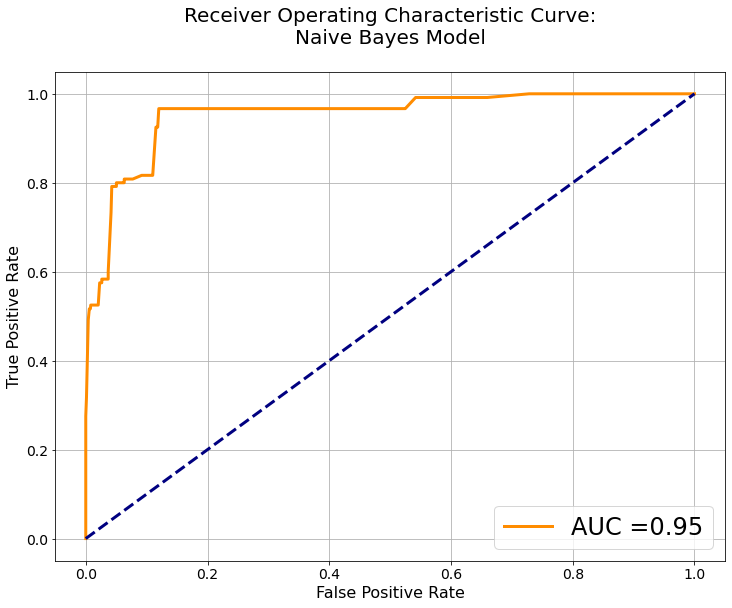

In [ ]:
large = 24


plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)
#plt.set_facecolor('xkcd:white')
plt.figure(figsize=(12,9))
y_pred_proba_knn = clf_nb.predict_proba(X_test)[:,1]
variable2=y_pred_proba_knn

fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba_knn)
auc = metrics.roc_auc_score(Y_test, y_pred_proba_knn)

naive_bayes_model_object={}
naive_bayes_model_object['fpr']=fpr
naive_bayes_model_object['tpr']=tpr
naive_bayes_model_object['auc']=auc

plt.plot(fpr,tpr,label="AUC ="+str(round(auc,2)), lw=3,color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve:\nNaive Bayes Model\n')
plt.legend(loc="lower right")
plt.grid("off")
plt.show()

# **ELM**(Exteme Learning Machine) Training

## Supporting functions for ELM network

In [ ]:
def create_one_hot_encoding(classes, shape):#(y,(9142,2))
    one_hot_encoding = np.zeros(shape)#(9142x2) 2D array with all '0'
    for i in range(0, len(one_hot_encoding)):
        one_hot_encoding[i][int(classes[i])] = 1
    return one_hot_encoding# creates 2D array [compliment(y),y]
def train(weights, x, y):
    h = x.dot(weights)
    h = np.maximum(h, 0, h)
    return np.linalg.pinv(h).dot(y)
def soft_max(layer):
    soft_max_output_layer = np.zeros(len(layer))#matrix[i]
    for i in range(0, len(layer)):
        numitor = 0
        for j in range(0, len(layer)):
            numitor += np.exp(layer[j] - np.max(layer))
        soft_max_output_layer[i] = np.exp(layer[i] - np.max(layer)) / numitor
    return soft_max_output_layer

def matrix_soft_max(matrix_):
    soft_max_matrix = []
    for i in range(0, len(matrix_)):
        soft_max_matrix.append(soft_max(matrix_[i]))
    return soft_max_matrix
def check_network_power(o, o_real):#o_real is actuall label(TP and TN).This function can create confusion 
    TP=0
    TN=0
    FP=0
    FN=0

    tcount = 0
    fcount = 0
    for i in range(0, len(o)):
        TP += 1 if np.argmax(o[i]) == 1 and  np.argmax(o_real[i]) == 1 else 0#comparing prediction vs real
    for i in range(0, len(o)):
        TN += 1 if np.argmax(o[i]) == 0 and  np.argmax(o_real[i]) == 0 else 0 
    for i in range(0, len(o)):
        FP += 1 if np.argmax(o[i]) == 1 and  np.argmax(o_real[i]) == 0 else 0
    for i in range(0, len(o)):
        FN += 1 if np.argmax(o[i]) == 0 and  np.argmax(o_real[i]) == 1 else 0
    return TP,TN,FP,FN #TP+TN
def test(weights, beta, x, y):
    h = x.dot(weights)
    h = np.maximum(h, 0, h)  # ReLU
    o = matrix_soft_max(h.dot(beta))
     
    tp,tn,fp,fn=check_network_power(o, y)#calculation of accuracy(TP+TN/total)
    accuracy=(tp+tn)/len(y)
    #Recall For 1 and 0
    if(tp+fn==0):
      recall0 = 0
    else:
      recall0 = tp/(tp+fn)
    if(tn+fp==0):
      recall1=0
    else:
      recall1 = tn/(tn+fp)
    #Precesion For 1 and 0
    if(tp+fn!=0):
      precession1=tp/(tp+fp)
    else:
      precession1=0

    if(tp+fn!=0):
     precession0=tn/(tn+fn)
    else:
     precession0=0

     #F1 
    if(fp+fn==0):
      f10=f11=0
    else:
      f10=tp/(tp+(.5*(fp+fn)))
      f11=tn/(tn+(.5*(fp+fn)))
      f10=round(f10,2)
      f11=round(f11,2)

    print("\n\tPrediction Result on ELM Model")
    print("\t--------------------------------------\n")

    print(f"\n\tAccuracy : {accuracy*100}")

    print("\n\n")
    print("      precision       recall          f1-score         support \n")
    print("0       {}           {}             {}             {}".format(round(precession0,2),round(recall0,2),f10,tn))
    print("1       {}           {}             {}             {}".format(round(precession1,2),round(recall1,2),f11,tp))

    

## **ELM** training and testing

In [ ]:
class_column = 13
data_s=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/twets_elm2.csv')
db = data_s.iloc[:, :].values.astype(np.float)

y = db[:, class_column]
y -= np.min(y)
x = np.delete(db, [class_column], axis=1)#no change to x
sm = SMOTE(random_state = 1)
x,y= sm.fit_sample(x, y)
db=np.column_stack((x,y))
np.random.shuffle(db)

y = db[:, class_column]
y -= np.min(y)
x = np.delete(db, [class_column], axis=1)#no change to x
print(Counter(y))
output_layer_perceptron_count = len(np.unique(y))#total no of unique items(class labels in y,ir 1,0) = 2
y = create_one_hot_encoding(y, (len(y), len(np.unique(y))))#pass (y,(9142,2))
# Now x is features y is label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=300,random_state=44)



Counter({0.0: 8415, 1.0: 8415})


In [ ]:
                                                                                                                                                                                                                                                                                                                                           

hidden_layer_perceptron_count =1000# len(y_test)
x = preprocessing.normalize(x)
weights = np.random.random((len(x[0]), hidden_layer_perceptron_count))
beta = train(weights, x_train, y_train)
test(weights, beta, x_test, y_test)



	Prediction Result on ELM Model
	--------------------------------------


	Accuracy : 70.0



      precision       recall          f1-score         support 

0       1.0           1.0             0.77             60
1       0.62           0.4             0.57             150
